Predicting the diabetes in a patient using Decision Tree/Random Forest Classifier. The dataset for this project is taken from https://www.kaggle.com/uciml/pima-indians-diabetes-database.


### Import and preprocess data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import pickle

In [2]:
data = pd.read_csv('C:\Python Scripts\ML_cwiczenia\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and columns in dataset
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


“Outcome” is the feature we are going to predict, 0 means "no diabetes", 1 means "diabetes". Of these 768 data points, 500 are labeled as 0 and 268 as 1.

### Building and training model

In [9]:
# feature selection
X = data.drop(columns='Outcome')
y = data.loc[:, 'Outcome']

In [10]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


#### Train model

In [11]:
tree = DecisionTreeClassifier(random_state=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [12]:
y_predict = tree.predict(X_test)
print(y_predict)

[0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]


In [13]:
print('Accuracy on train: {}'.format(tree.score(X_train, y_train)))
print('Accuracy on test: {}'.format(tree.score(X_test, y_test)))

Accuracy on train: 1.0
Accuracy on test: 0.7207792207792207


In [14]:
print("All nodes in tree:", tree.tree_.node_count)

All nodes in tree: 229


In [15]:
print('Feature importance:')
dict(zip(X_train.columns, tree.feature_importances_))

Feature importance:


{'Pregnancies': 0.08036988417061318,
 'Glucose': 0.33182942620550915,
 'BloodPressure': 0.07964293663359606,
 'SkinThickness': 0.017932242990654212,
 'Insulin': 0.05454687884077635,
 'BMI': 0.1946860793518772,
 'DiabetesPedigreeFunction': 0.09625346842588577,
 'Age': 0.1447390833810882}

You can see that glucose is the most important in the classification

**Tree visualization**

In [91]:
#feature names and class names in the set
diab_feature_names = X.columns
diab_class_names = y.unique()

print("Features:", diab_feature_names)
print("Class:", diab_class_names)

Features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Class: [1 0]


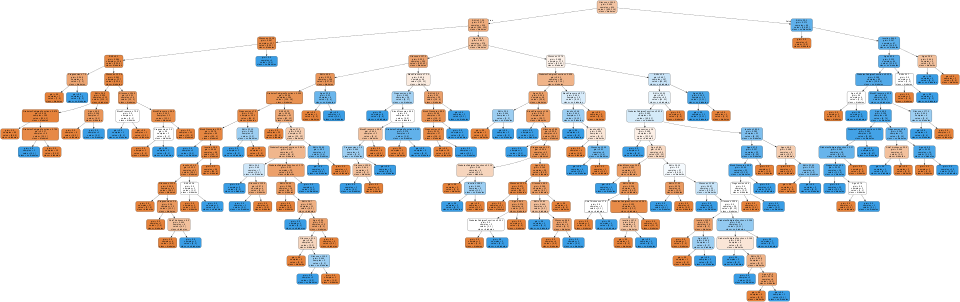

In [83]:
dot_data = StringIO()
export_graphviz(
    tree, 
    out_file=dot_data, 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    feature_names=diab_feature_names, 
    class_names=['diabetes', 'no diabetes']) 
    
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('diabetes.png')
graph.set_size('"10,7!"')
Image(graph.create_png())

### Confusion matrix

In [16]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

print('Accuracy:', accuracy_score(y_test, y_predict))

[[87 13]
 [30 24]]
Accuracy: 0.7207792207792207


In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



### GridSearch

In [18]:
tree = DecisionTreeClassifier()

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [10, 30, 50, 50],
    'max_depth' : [5,10,15]
}

grid = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 50}

In [19]:
grid.best_score_

0.739413680781759

In [20]:
grid.score(X_train, y_train)

0.8029315960912052

In [21]:
grid.score(X_test, y_test)

0.7987012987012987

In [22]:
grid.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

### Random Forest

Random Forest creates a set of trees with less complexity, and predictions are made based on voting.

In [23]:
clrf = RandomForestClassifier(n_estimators=200, random_state=0)
clrf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
pred = clrf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [25]:
print('Accuracy on train data:{}'.format(clrf.score(X_train, y_train)))
print('Accuracy on test data:{}'.format(clrf.score(X_test, y_test)))

Accuracy on train data:1.0
Accuracy on test data:0.7402597402597403


### Significance of variables

In [29]:
clrf.feature_importances_

array([0.08530699, 0.25944288, 0.08675297, 0.07378949, 0.07793076,
       0.16048623, 0.12178888, 0.1345018 ])

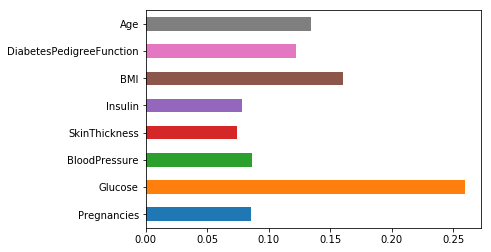

In [30]:
importance = pd.Series(clrf.feature_importances_, index=X_train.columns)
importance.plot(kind='barh')

It can be seen that the most important variable is glucose.

### Conclusion

By using Grid Search classifier we got best score/accuracy of 0.739 and by using Random Forest the accurcy was 0.74. In both cases it was about 74%.

##### Algorithm comparison
Accuracy:
* Logistic regression: 80%
* KNN: 76%
* Decision tree/Random Forest: 74%

In comparison of three algorithms the best accuracy was obtained in a logistic regression.


**Save the model**

In [31]:
model = tree

In [32]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [33]:
with open("model.pkl", "rb") as model_file:
    unpickled_model = pickle.load(model_file)
    unpickled_model

In [34]:
tree = unpickled_model